In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [2]:
train_index = train["Id"]
test_index = test["Id"]
train.drop(["Id"], axis=1, inplace=True)
test.drop(["Id"], axis=1, inplace=True)

In [3]:
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))


In [4]:
y_train_a = train['SalePrice']
X_train_a = train.drop(['SalePrice'], axis=1)
X_test_a = test

In [5]:
X_train_a.fillna(X_train_a.mean())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.000000,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.000000,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.000000,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.000000,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.000000,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4
5,50,3,85.000000,14115,1,2,0,3,0,4,...,0,0,3,2,2,700,10,2009,8,4
6,20,3,75.000000,10084,1,2,3,3,0,4,...,0,0,3,4,4,0,8,2007,8,4
7,60,3,70.049958,10382,1,2,0,3,0,0,...,0,0,3,4,2,350,11,2009,8,4
8,50,4,51.000000,6120,1,2,3,3,0,4,...,0,0,3,4,4,0,4,2008,8,0
9,190,3,50.000000,7420,1,2,3,3,0,0,...,0,0,3,4,4,0,1,2008,8,4


In [6]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

NameError: name 'X_train' is not defined

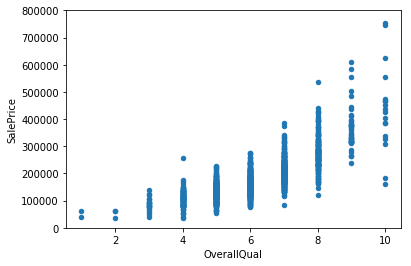

In [7]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


In [8]:
train = train.drop(train[(train['OverallQual']>=10) & (train['SalePrice']<250000)].index)


In [9]:
train = train.drop(train[(train['YearBuilt']>=2000) & (train['SalePrice']<100000)].index)
train = train.drop(train[(train['YearBuilt']<=1900) & (train['SalePrice']>400000)].index)

In [10]:
train = train.drop(train[(train['YearRemodAdd']<=1990) & (train['SalePrice']>350000)].index)


In [11]:
train = train.drop(train[(train["GrLivArea"]>=3000) & (train['SalePrice']<300000)].index)

In [12]:
from sklearn.model_selection import train_test_split

X = train.loc[:, ["OverallQual", "YearBuilt", "YearRemodAdd", "1stFlrSF", "GrLivArea", "FullBath", "GarageCars"]].values
y = train["SalePrice"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.4, random_state=1)


In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# データの分割方法を指定（層化）
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# パラメータの設定
param_grid = {'n_estimators': [400, 500, 600],
              'max_depth':  [3, 4]}

# グリッドサーチのモデルのインスタンスを作成
forest_model = GridSearchCV(RandomForestRegressor(), param_grid, cv = kf)

In [14]:
forest_model.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [400, 500, 600], 'max_depth': [3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
y_train_pred = forest_model.predict(X_train)
y_test_pred = forest_model.predict(X_test)

In [16]:
forest_model.fit(X, y)

forest_model.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6933654347765676

In [17]:
from sklearn.metrics import mean_squared_error
print("MSE train: %.3f, test: %.3f" % (mean_squared_error(y_train, y_train_pred), 
                                       mean_squared_error(y_test, y_test_pred)))


MSE train: 832343771.941, test: 846059978.088


In [18]:
from sklearn.metrics import r2_score
print("R^2 train: %.3f, test: %.3f" % (r2_score(y_train, y_train_pred), 
                                       r2_score(y_test, y_test_pred)))


R^2 train: 0.874, test: 0.851


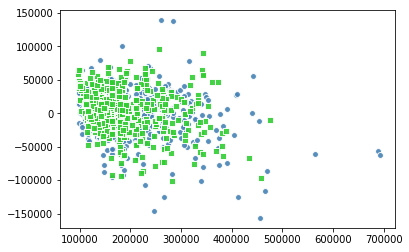

In [19]:
plt.scatter(y_train_pred, y_train_pred - y_train, c = "steelblue", edgecolor = "white", marker ="o", s = 35, alpha = 0.9, label = "training data")

plt.scatter(y_test_pred, y_test_pred - y_test, c = "limegreen", edgecolor = "white", marker = "s", s = 35, alpha = 0.9, label = "test data")

In [20]:
test = test['GarageCars'].fillna(test['GarageCars'].mean())

In [21]:
df_visualize = pd.concat((pd.DataFrame(y_test), np.round(pd.DataFrame(y_test_pred))), axis=1)
df_visualize.columns = ['実際の値','予測値']
df_visualize.head(10)

,実際の値,予測値
0,140000,143968.0
1,107500,116464.0
2,171000,140125.0
3,319000,286915.0
4,153000,141464.0
5,187500,181248.0
6,162000,159785.0
7,163500,115885.0
8,129900,124188.0
9,125500,115093.0


In [22]:
y_pred_final = forest_model.predict(X_test)

In [23]:
submission = pd.DataFrame({
    "Id": test_index,
    "SalePrice": forest_model.predict(X_test)
})
submission.to_csv('sample_submission.csv', index=False)

ValueError: array length 580 does not match index length 1459